In [1]:
import numpy as np

import pandas as pd
from pandas.plotting import table

import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
pd.set_option('display.max_columns', 0)
pd.set_option('display.max_rows', 0)

In [3]:
data_path = r'C:\Users\DucTRung\Desktop\GitHub\Covid_19_and_Press_Freedom_Index_Analysis\wrangled_frame'

In [4]:
charts_path = r'C:\Users\DucTRung\Desktop\GitHub\Covid_19_and_Press_Freedom_Index_Analysis\charts'

In [5]:
df = pd.read_csv(data_path + "\\wrangled_f_6.csv")

In [6]:
df.isnull().sum()

country                      0
total_cases                  0
total_deaths                 0
total_recovered              5
total_tests                 19
cases/1m                     0
deaths/1m                    0
tests/1m                    19
press_freedom_index_2020     0
region                       0
continent                    0
pfi_category                 0
dtype: int64

# by Continent

## Calculate a table contains all information about Best and Worst PFI score each Conitinent

In [8]:
def best_worst(group):
    return {'mean_pfi': group.mean(),
            'best_pfi': group.min(),
            'worst_pfi': group.max()}

In [10]:
con_f = df['press_freedom_index_2020'].groupby(df['continent']).apply(best_worst).unstack()

In [11]:
con_f

,mean_pfi,best_pfi,worst_pfi
continent,,,
Africa,38.238600,19.25,83.50
Asia,44.080625,20.45,78.48
Europe,22.485750,7.84,49.75
North America,30.499333,10.51,63.81
Oceania,20.560000,10.69,27.41
South America,30.856667,15.79,45.66


### Extract B and W from df

In [12]:
best_countries_f = df.set_index(df['press_freedom_index_2020'].isin(con_f['best_pfi'])).loc[True].reset_index(drop=True)[['country', 'cases/1m', 'deaths/1m', 'continent']].set_index('continent')

In [13]:
worst_countries_f = df.set_index(df['press_freedom_index_2020'].isin(con_f['worst_pfi'])).loc[True].reset_index(drop=True)[['country', 'cases/1m', 'deaths/1m', 'continent']].set_index('continent')

### Merge

In [14]:
con_f = pd.merge(con_f, best_countries_f, left_index=True, right_index=True)

In [15]:
con_f = pd.merge(con_f, worst_countries_f, left_index=True, right_index=True)

In [16]:
con_f.rename(columns={'country_x': 'country_best',
                      'country_y': 'country_worst',
                      'cases/1m_x': 'cases/1m_best',
                      'cases/1m_y': 'cases/1m_worst',
                      'deaths/1m_x': 'deaths/1m_best',
                      'deaths/1m_y': 'deaths/1m_worst'}, inplace=True)

### Save

In [40]:
con_f.to_csv(data_path + '\\best_worst_country_by_continent.csv', index=False)

## List of Best and Worst countries

In [17]:
con_f.sort_values(by='mean_pfi', inplace=True)

In [18]:
con_f

,mean_pfi,best_pfi,worst_pfi,country_best,cases/1m_best,deaths/1m_best,country_worst,cases/1m_worst,deaths/1m_worst
continent,,,,,,,,,
Oceania,20.560000,10.69,27.41,New Zealand,309.0,4.0,Fiji,20.0,0.0
Europe,22.485750,7.84,49.75,Norway,1467.0,40.0,Belarus,2038.0,12.0
North America,30.499333,10.51,63.81,Jamaica,160.0,3.0,Cuba,149.0,6.0
South America,30.856667,15.79,45.66,Uruguay,193.0,5.0,Venezuela,13.0,0.4
Africa,38.238600,19.25,83.50,Namibia,6.0,0.0,Eritrea,11.0,0.0
Asia,44.080625,20.45,78.48,Cyprus,727.0,12.0,China,58.0,3.0


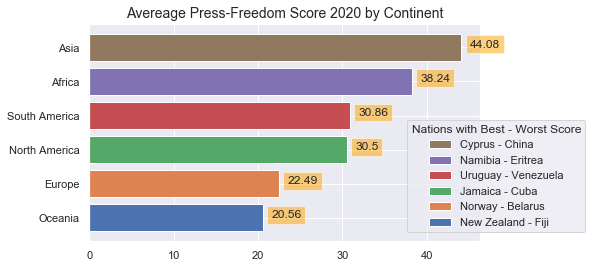

In [104]:
fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(7,4))

for i, j in enumerate(con_f.index):
    ax.barh(data=con_f.loc[j], y=j, width='mean_pfi', label=(con_f.loc[j][['country_best', 'country_worst']].values[0] +" - "+con_f.loc[j][['country_best', 'country_worst']].values[1])) 
    ax.text(round(con_f.loc[j]['mean_pfi'], 2)+1, i, s=str(round(con_f.loc[j]['mean_pfi'], 2)), bbox=dict(facecolor='orange', alpha=.5))

handles, labels = ax.get_legend_handles_labels()
plt.legend(reversed(handles), reversed(labels), title='Nations with Best - Worst Score', loc='center left', bbox_to_anchor=(.8, 0.3))
plt.title('Avereage Press-Freedom Score 2020 by Continent', fontsize=14)
plt.savefig(charts_path + '\\pfi_con.jpg', bbox_inches='tight')

## Analyze Best vs Worst

### Cases over 1 million population

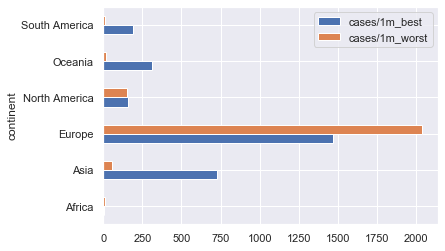

In [45]:
con_f[['cases/1m_best', 'cases/1m_worst']].plot(kind='barh')

In [90]:
x1 = con_f[con_f['cases/1m_best'] > con_f['cases/1m_worst']]

In [59]:
x1.index.values

array(['Oceania', 'North America', 'South America', 'Asia'], dtype=object)

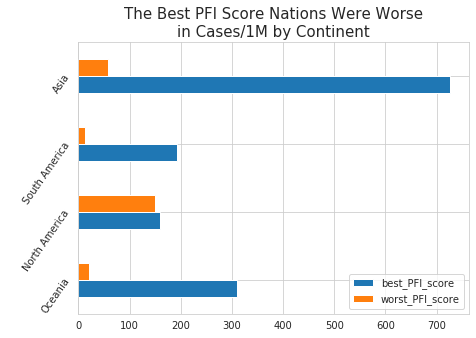

In [92]:
with sns.axes_style('whitegrid'):

    fig, ax = plt.subplots(figsize=(7,5))
    x1[['cases/1m_best', 'cases/1m_worst']].plot(kind='barh', ax=ax)
    ax.set_ylabel(" ")
    ax.set_title(label=("The Best PFI Score Nations Were Worse\n" + "in Cases/1M by Continent"), fontsize=15)
    handles, labels = ax.get_legend_handles_labels()
    ax.legend(labels=['best_PFI_score', 'worst_PFI_score'])
    ax.set_yticklabels(labels=['Oceania', 'North America', 'South America', 'Asia'], rotation=55)
plt.tight_layout
plt.savefig(charts_path + '\\best_score_worse_perf_case.jpg')

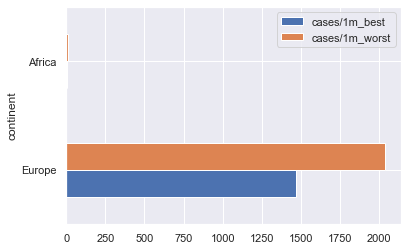

In [106]:
con_f[con_f['cases/1m_best'] < con_f['cases/1m_worst']][['cases/1m_best', 'cases/1m_worst']].plot(kind='barh')

### Deaths over 1 million population

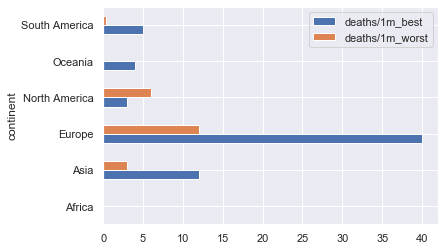

In [46]:
con_f[['deaths/1m_best', 'deaths/1m_worst']].plot(kind='barh')

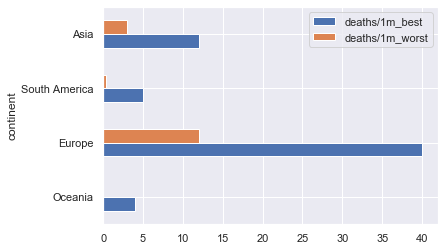

In [109]:
con_f[con_f['deaths/1m_best'] > con_f['deaths/1m_worst']][['deaths/1m_best', 'deaths/1m_worst']].plot(kind='barh')

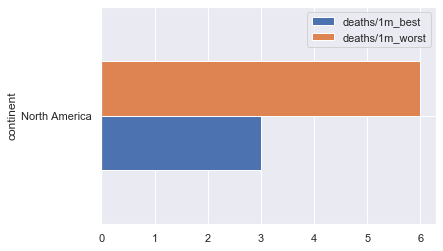

In [110]:
con_f[con_f['deaths/1m_best'] < con_f['deaths/1m_worst']][['deaths/1m_best', 'deaths/1m_worst']].plot(kind='barh')

# by Region

## Calculate a table contains all information about Best and Worst PFI score each Region

In [9]:
reg_f = df['press_freedom_index_2020'].groupby(df['region']).apply(best_worst).unstack()

In [141]:
reg_f

,mean_pfi,best_pfi,worst_pfi
region,,,
Australia & New Zealand,15.450000,10.69,20.21
Caribbean,31.128000,10.51,63.81
Central America,32.838750,10.53,48.20
Central Asia,48.177500,30.19,55.34
Eastern Africa,42.708333,27.68,83.50
Eastern Asia,35.736667,23.70,78.48
Eastern Europe,32.905000,22.67,49.75
Melanesia,25.670000,23.93,27.41
Middle Africa,42.375000,33.92,56.38


### Extract B and W from df

In [29]:
best_countries_f = df.set_index(df['press_freedom_index_2020'].isin(reg_f['best_pfi'])).loc[True].reset_index(drop=True)[['country', 'cases/1m', 'deaths/1m', 'region']].set_index('region')

In [30]:
worst_countries_f = df.set_index(df['press_freedom_index_2020'].isin(reg_f['worst_pfi'])).loc[True].reset_index(drop=True)[['country', 'cases/1m', 'deaths/1m', 'region', 'continent']].set_index('region')

### Merge

In [31]:
reg_f = pd.merge(reg_f, best_countries_f, left_index=True, right_index=True)

In [32]:
reg_f = pd.merge(reg_f, worst_countries_f, left_index=True, right_index=True)

In [33]:
reg_f.rename(columns={'country_x': 'country_best',
                      'country_y': 'country_worst',
                      'cases/1m_x': 'cases/1m_best',
                      'cases/1m_y': 'cases/1m_worst',
                      'deaths/1m_x': 'deaths/1m_best',
                      'deaths/1m_y': 'deaths/1m_worst'}, inplace=True)

### Save

In [148]:
reg_f.to_csv(data_path + '\\best_worst_country_by_region.csv', index=False)

## List of Best and Worst countries

In [34]:
reg_f.sort_values(by='mean_pfi', inplace=True)

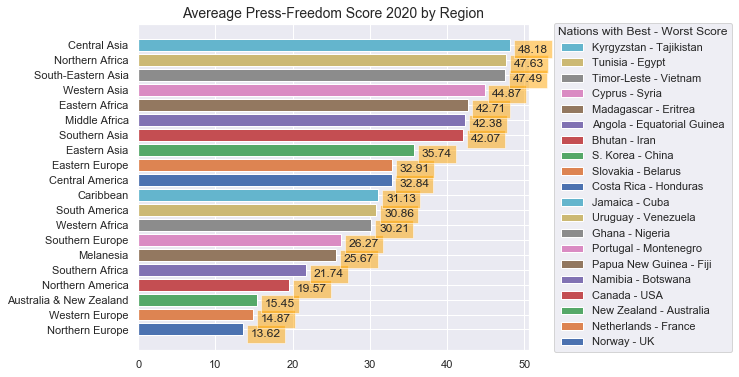

In [207]:
fig, ax = plt.subplots(figsize=(7,6))

for i, j in enumerate(reg_f.index):
    ax.barh(y=j, width=reg_f.loc[j]['mean_pfi'], label=(reg_f.loc[j][['country_best', 'country_worst']].values[0] +" - "+reg_f.loc[j][['country_best', 'country_worst']].values[1]))
    ax.text(s=str(round(reg_f.loc[j]['mean_pfi'], 2)), x=round(reg_f.loc[j]['mean_pfi'], 2)+1, y=i-.5, bbox=dict(facecolor='orange', alpha=.5))
    
handles, labels = ax.get_legend_handles_labels()
plt.legend(reversed(handles), reversed(labels), title='Nations with Best - Worst Score', loc='center left', bbox_to_anchor=(1.05, 0.5))
plt.title('Avereage Press-Freedom Score 2020 by Region', fontsize=14)  

plt.savefig(charts_path + '\\pfi_reg.jpg', bbox_inches='tight')

## Analyze Best vs Worst

### Case over 1 million population

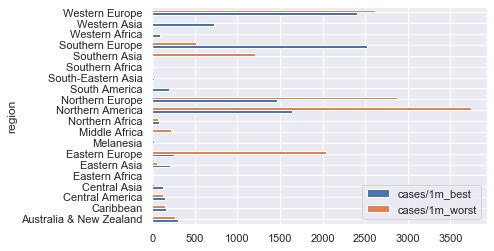

In [62]:
reg_f[['cases/1m_best', 'cases/1m_worst']].plot(kind='barh') # chia ra thanh 2 chart, #1 worst>best -- #2 best>worst

#### Best is worse than Worst

In [93]:
x1 = reg_f[reg_f['cases/1m_best'] > reg_f['cases/1m_worst']]

In [42]:
x1.index.values

array(['Australia & New Zealand', 'Southern Europe', 'Western Africa',
       'South America', 'Caribbean', 'Central America', 'Eastern Asia',
       'Western Asia', 'South-Eastern Asia', 'Northern Africa',
       'Central Asia'], dtype=object)

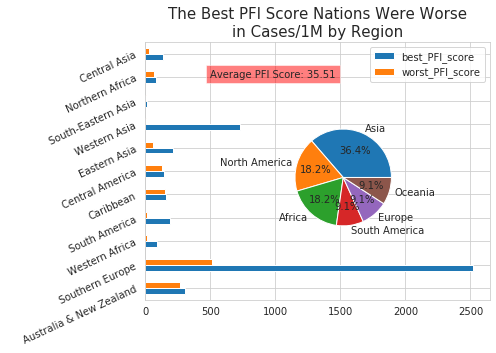

In [95]:
with sns.axes_style('whitegrid'):
    fig, ax = plt.subplots(figsize=(7,5))
    x1[['cases/1m_best', 'cases/1m_worst']].plot(kind='barh', ax=ax)
    ax.set_title(label=('The Best PFI Score Nations Were Worse\n'+'in Cases/1M by Region'), fontsize=15)
    ax.set_ylabel(" ")
    ax.text(x=500, y=9, s=('Average PFI Score: '+str(round(x1['mean_pfi'].mean(),2))), bbox=dict(facecolor='red', alpha=.5))
    ax.legend(labels=['best_PFI_score', 'worst_PFI_score'])
    ax.set_yticklabels(labels=['Australia & New Zealand', 'Southern Europe', 'Western Africa',
       'South America', 'Caribbean', 'Central America', 'Eastern Asia',
       'Western Asia', 'South-Eastern Asia', 'Northern Africa',
       'Central Asia'], rotation=25)
    ins = ax.inset_axes([0.4,0.1,0.35,0.75])
    x1['continent'].value_counts().plot(kind='pie', autopct='%1.1f%%', ax=ins)
    ins.set_ylabel(" ")
#     ins.set_xlim(0,20)
plt.tight_layout()    
plt.savefig(charts_path + '\\best_score_worse_perf_case_reg.jpg')

In [214]:
x1['cases/1m_best'] / x1['cases/1m_worst']

region
Australia & New Zealand      1.144444
Southern Europe              4.885659
Western Africa               6.285714
South America               14.846154
Caribbean                    1.073826
Central America              1.156250
Eastern Asia                 3.637931
Western Asia               242.333333
South-Eastern Asia           6.000000
Northern Africa              1.228571
Central Asia                 4.322581
dtype: float64

In [216]:
x1.loc[['Western Asia', 'Southern Europe', 'Western Africa', 'South America', 'Eastern Asia', 'South-Eastern Asia', 'Central Asia']]

,mean_pfi,best_pfi,worst_pfi,country_best,cases/1m_best,deaths/1m_best,country_worst,cases/1m_worst,deaths/1m_worst,continent
region,,,,,,,,,,
Western Asia,44.873333,20.45,72.57,Cyprus,727.0,12.0,Syria,3.0,0.2,Asia
Southern Europe,26.269167,11.83,33.83,Portugal,2521.0,105.0,Montenegro,516.0,13.0,Europe
Western Africa,30.212667,22.26,35.63,Ghana,88.0,0.6,Nigeria,14.0,0.5,Africa
South America,30.856667,15.79,45.66,Uruguay,193.0,5.0,Venezuela,13.0,0.4,South America
Eastern Asia,35.736667,23.70,78.48,S. Korea,211.0,5.0,China,58.0,3.0,Asia
South-Eastern Asia,47.492727,29.90,74.71,Timor-Leste,18.0,0.0,Vietnam,3.0,0.0,Asia
Central Asia,48.177500,30.19,55.34,Kyrgyzstan,134.0,2.0,Tajikistan,31.0,0.5,Asia


In [210]:
x1[['mean_pfi', 'continent']]

,mean_pfi,continent
region,,
Australia & New Zealand,15.450000,Oceania
Southern Europe,26.269167,Europe
Western Africa,30.212667,Africa
South America,30.856667,South America
Caribbean,31.128000,North America
Central America,32.838750,North America
Eastern Asia,35.736667,Asia
Western Asia,44.873333,Asia
South-Eastern Asia,47.492727,Asia


In [295]:
round(x1['mean_pfi'].mean(),2)

35.51

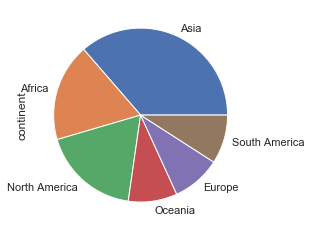

In [302]:
x1['continent'].value_counts().plot(kind='pie', autopct='%1.1f%%')

#### Best is better than Worst

In [79]:
x2 = reg_f[reg_f['cases/1m_best'] < reg_f['cases/1m_worst']]

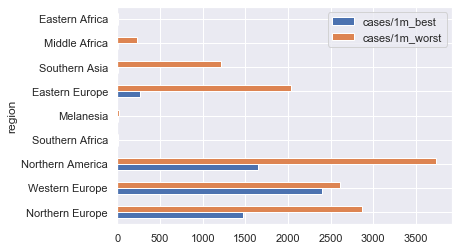

In [329]:
x2[['cases/1m_best', 'cases/1m_worst']].plot(kind='barh')

C:\Users\DucTRung\Anaconda3\envs\cc_env\lib\site-packages\ipykernel_launcher.py:24: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations


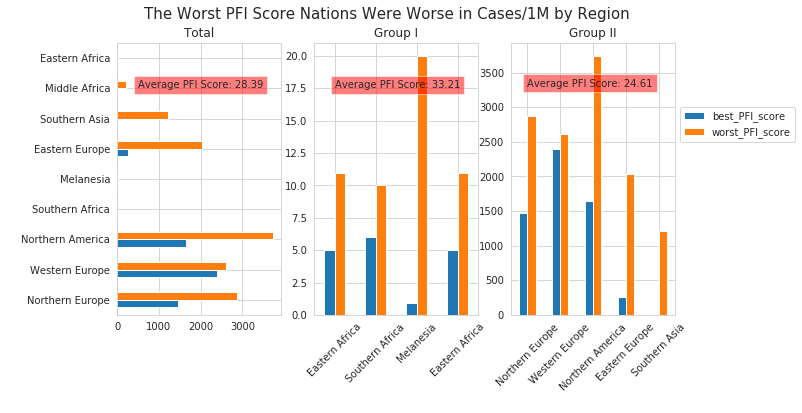

In [83]:
with sns.axes_style('whitegrid'):
    fig, axs = plt.subplots(ncols=3, nrows=1, figsize=(10,5))
    
    x2[['cases/1m_best', 'cases/1m_worst']].plot(kind='barh', ax=axs[0])
    axs[0].set_ylabel(" ")
    axs[0].text(x=500, y=7, s=('Average PFI Score: '+str(round(x2['mean_pfi'].mean(),2))), bbox=dict(facecolor='red', alpha=.5))
    axs[0].legend(labels=['best_PFI_score', 'worst_PFI_score'], loc='center left', bbox_to_anchor=(3.4, .7))
    axs[0].set_title('Total')

    x2.loc[['Eastern Africa', 'Southern Africa', 'Melanesia', 'Eastern Africa']][['cases/1m_best', 'cases/1m_worst']].plot(kind='bar', ax=axs[1], legend=False)
    axs[1].set_xlabel(" ")
    axs[1].set_xticklabels(['Eastern Africa', 'Southern Africa', 'Melanesia', 'Eastern Africa'], rotation=45)
    axs[1].text(x=0, y=17.5, s=('Average PFI Score: '+str(round(x2.loc[['Eastern Africa', 'Southern Africa', 'Melanesia', 'Eastern Africa']]['mean_pfi'].mean(), 2))), bbox=dict(facecolor='red', alpha=.5))
    axs[1].set_title('Group I')
    
    x2.loc[['Northern Europe', 'Western Europe', 'Northern America', 'Eastern Europe', 'Southern Asia']][['cases/1m_best', 'cases/1m_worst']].plot(kind='bar', ax=axs[2], legend=False)
    axs[2].set_xlabel(" ")
    axs[2].set_xticklabels(['Northern Europe', 'Western Europe', 'Northern America', 'Eastern Europe', 'Southern Asia'], rotation=45)
    axs[2].text(x=0, y=3300, s=('Average PFI Score: '+str(round(x2.loc[['Eastern Europe', 'Northern America', 'Northern Europe', 'Western Europe', 'Southern Asia']]['mean_pfi'].mean(),2))), bbox=dict(facecolor='red', alpha=.5))
    axs[2].set_title('Group II')

    fig.suptitle('The Worst PFI Score Nations Were Worse in Cases/1M by Region', fontsize=15)

plt.tight_layout()    
plt.savefig(charts_path + "\\worst_score_worse_perf_case_region.jpg", bbox_inches='tight')

In [348]:
x2.index.values

array(['Northern Europe', 'Western Europe', 'Northern America',
       'Southern Africa', 'Melanesia', 'Eastern Europe', 'Southern Asia',
       'Middle Africa', 'Eastern Africa'], dtype=object)

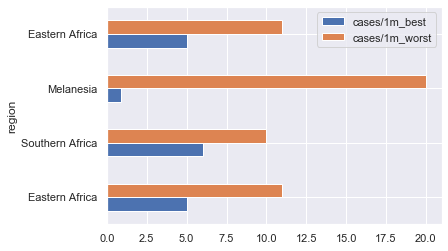

In [339]:
x2.loc[['Eastern Africa', 'Southern Africa', 'Melanesia', 'Eastern Africa']][['cases/1m_best', 'cases/1m_worst']].plot(kind='barh')

In [355]:
str(round(x2.loc[['Eastern Africa', 'Southern Africa', 'Melanesia', 'Eastern Africa']]['mean_pfi'].mean(), 2))

'33.21'

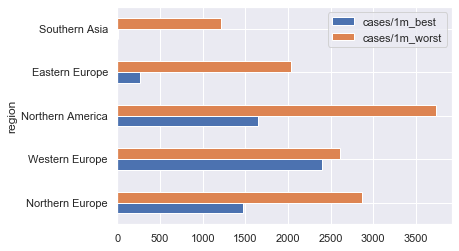

In [349]:
x2.loc[['Northern Europe', 'Western Europe', 'Northern America',
         'Eastern Europe', 'Southern Asia']][['cases/1m_best', 'cases/1m_worst']].plot(kind='barh')

In [356]:
str(round(x2.loc[['Eastern Europe', 'Northern America', 'Northern Europe', 'Western Europe', 'Southern Asia']]['mean_pfi'].mean(),2))

'24.61'

In [159]:
x2['mean_pfi'].mean()

28.39163888888889

In [163]:
x2['continent'].value_counts()

Africa           3
Europe           3
Oceania          1
Asia             1
North America    1
Name: continent, dtype: int64

### Deaths over 1 million population

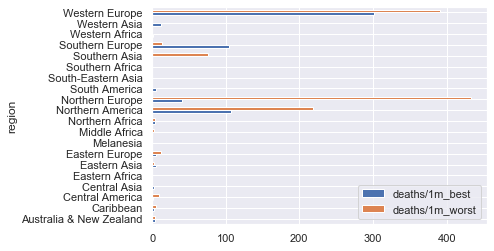

In [63]:
reg_f[['deaths/1m_best', 'deaths/1m_worst']].plot(kind='barh')

#### Best is worse than Worst

In [76]:
x1 = reg_f[reg_f['deaths/1m_best'] > reg_f['deaths/1m_worst']]

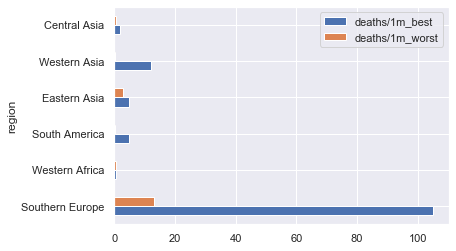

In [394]:
x1[['deaths/1m_best', 'deaths/1m_worst']].plot(kind='barh')

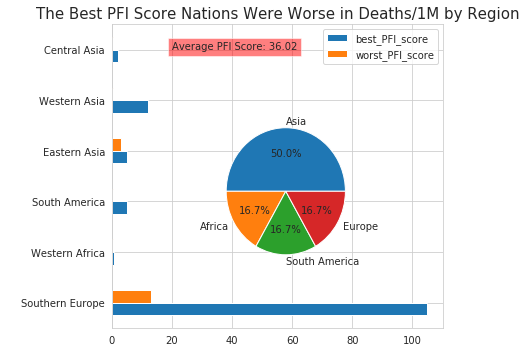

In [78]:
with sns.axes_style('whitegrid'):
    fig, ax = plt.subplots(figsize=(7, 5))
    x1[['deaths/1m_best', 'deaths/1m_worst']].plot(kind='barh', ax=ax)
    ax.set_title('The Best PFI Score Nations Were Worse in Deaths/1M by Region', fontsize=15)
    ax.set_ylabel(" ")
    ax.text(x=20, y=5, s=('Average PFI Score: '+str(round(x1['mean_pfi'].mean(),2))), bbox=dict(facecolor='red', alpha=.5))
    ax.legend(labels=['best_PFI_score', 'worst_PFI_score'])

    ins = ax.inset_axes([0.3,0.1,0.45,0.7])
    x1['continent'].value_counts().plot(kind='pie', autopct='%1.1f%%', ax=ins)
    ins.set_ylabel(" ")
plt.tight_layout()    
plt.savefig(charts_path + "\\best_score_worse_perf_death_region.jpg", bbox_inches='tight')

In [169]:
x1['mean_pfi'].mean()

36.021

In [170]:
x1['continent'].value_counts()

Asia             3
South America    1
Europe           1
Africa           1
Name: continent, dtype: int64

#### The Best is better than The Worst

In [84]:
x2 = reg_f[reg_f['deaths/1m_best'] < reg_f['deaths/1m_worst']]

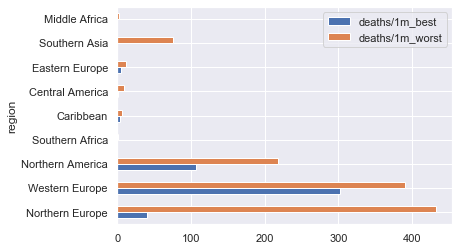

In [406]:
x2[['deaths/1m_best', 'deaths/1m_worst']].plot(kind='barh')

C:\Users\DucTRung\Anaconda3\envs\cc_env\lib\site-packages\ipykernel_launcher.py:24: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations


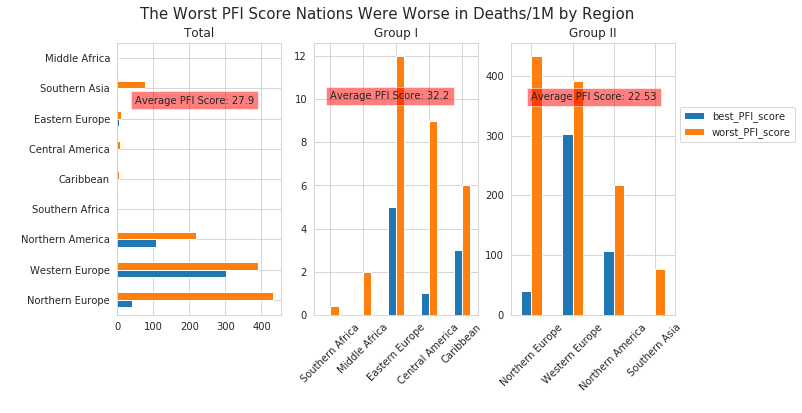

In [87]:
with sns.axes_style('whitegrid'):
    fig, axs = plt.subplots(ncols=3, nrows=1, figsize=(10,5))
    
    x2[['deaths/1m_best', 'deaths/1m_worst']].plot(kind='barh', ax=axs[0])
    axs[0].set_ylabel(" ")
    axs[0].text(x=50, y=6.5, s=('Average PFI Score: '+str(round(x2['mean_pfi'].mean(),2))), bbox=dict(facecolor='red', alpha=.5))
    axs[0].legend(labels=['best_PFI_score', 'worst_PFI_score'], loc='center left', bbox_to_anchor=(3.4, .7))
    axs[0].set_title('Total')

    x2.loc[['Southern Africa', 'Middle Africa', 'Eastern Europe', 'Central America', 'Caribbean']][['deaths/1m_best', 'deaths/1m_worst']].plot(kind='bar', ax=axs[1], legend=False)
    axs[1].set_xlabel(" ")
    axs[1].set_xticklabels(['Southern Africa', 'Middle Africa', 'Eastern Europe', 'Central America', 'Caribbean'], rotation=45)
    axs[1].text(x=0, y=10, s=('Average PFI Score: '+str(round(x2.loc[['Southern Africa', 'Middle Africa', 'Eastern Europe', 'Central America', 'Caribbean']]['mean_pfi'].mean(),2))), bbox=dict(facecolor='red', alpha=.5))
    axs[1].set_title('Group I')
    
    x2.loc[['Northern Europe', 'Western Europe', 'Northern America','Southern Asia']][['deaths/1m_best', 'deaths/1m_worst']].plot(kind='bar', ax=axs[2], legend=False)
    axs[2].set_xlabel(" ")
    axs[2].set_xticklabels(['Northern Europe', 'Western Europe', 'Northern America','Southern Asia'], rotation=45)
    axs[2].text(x=0, y=360, s=('Average PFI Score: '+str(round(x2.loc[['Northern Europe', 'Western Europe', 'Northern America','Southern Asia']]['mean_pfi'].mean(),2))), bbox=dict(facecolor='red', alpha=.5))
    axs[2].set_title('Group II')

    fig.suptitle('The Worst PFI Score Nations Were Worse in Deaths/1M by Region', fontsize=15)

plt.tight_layout()    
plt.savefig(charts_path + "\\worst_score_worse_perf_death_region.jpg", bbox_inches='tight')

In [173]:
x2['mean_pfi'].mean()

27.901462962962967

In [174]:
x2['continent'].value_counts()

Europe           3
North America    3
Africa           2
Asia             1
Name: continent, dtype: int64

In [412]:
x2.index.values

array(['Northern Europe', 'Western Europe', 'Northern America',
       'Southern Africa', 'Caribbean', 'Central America',
       'Eastern Europe', 'Southern Asia', 'Middle Africa'], dtype=object)

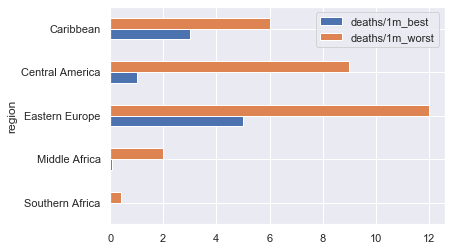

In [418]:
x2.loc[['Southern Africa', 'Middle Africa', 'Eastern Europe', 'Central America', 'Caribbean']][['deaths/1m_best', 'deaths/1m_worst']].plot(kind='barh')

In [415]:
str(round(x2.loc[['Southern Africa', 'Middle Africa', 'Eastern Europe', 'Central America', 'Caribbean']]['mean_pfi'].mean(),2))

'32.2'

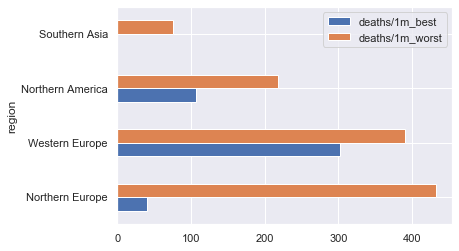

In [422]:
x2.loc[['Northern Europe', 'Western Europe', 'Northern America','Southern Asia']][['deaths/1m_best', 'deaths/1m_worst']].plot(kind='barh')

In [423]:
str(round(x2.loc[['Northern Europe', 'Western Europe', 'Northern America','Southern Asia']]['mean_pfi'].mean(),2))

'22.53'